In [4]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
from read_simulation_data.get_background_variable import get_background_variable

R_SUN = 6.957e10
G = 6.6743e-8

def read_solar_S_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T'])
        rho0 = np.array(f['/rho'])
        p0 = np.array(f['/p'])
        
        r_over_R = np.flip(r_over_R)
        c_s = np.flip(c_s)
        Gamma_1 = np.flip(Gamma_1)
        T0 = np.flip(T0)
        rho0 = np.flip(rho0)
        p0 = np.flip(p0)

        variables = {'r_over_R': r_over_R, 'c_s': c_s, 'Gamma_1': Gamma_1, 'T0': T0, 'rho0': rho0, 'p0': p0}
    return variables

In [2]:
RUN_NAME = "thesis_no_soft_wall/"
DATA_FOLDER = "/mn/stornext/d10/data/tabjone/data/"

#read solar S
solar_S = read_solar_S_hdf5("../additional_files/solar_s.h5")

/tmp/ipykernel_1493289/1931347204.py:4: RuntimeWarning: invalid value encountered in divide
  solar_S['g'] = -G*solar_S['M']/((solar_S['r_over_R']*R_SUN)**2)


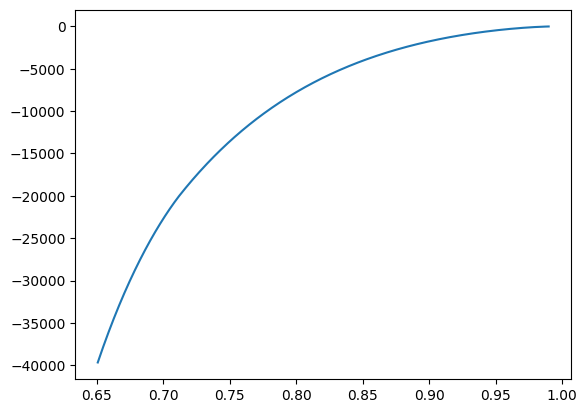

In [3]:
dp_dr_solar_S = np.gradient(solar_S['p0'], solar_S['r_over_R']*R_SUN)

solar_S['M'] = 4*np.pi*R_SUN**3 * cumtrapz(solar_S['rho0']*(solar_S['r_over_R'])**2, solar_S['r_over_R'], initial=0)
solar_S['g'] = -G*solar_S['M']/((solar_S['r_over_R']*R_SUN)**2)

solar_S_hydrostic_eq = solar_S['rho0']*solar_S['g'] + dp_dr_solar_S

# create a layer mask for r_over_R between 0.65 and 0.99
layer_mask = (solar_S['r_over_R'] > 0.65) & (solar_S['r_over_R'] < 0.99)

#plot hydrostatic equilibrium
plt.figure()
plt.plot(solar_S['r_over_R'][layer_mask], solar_S_hydrostic_eq[layer_mask])

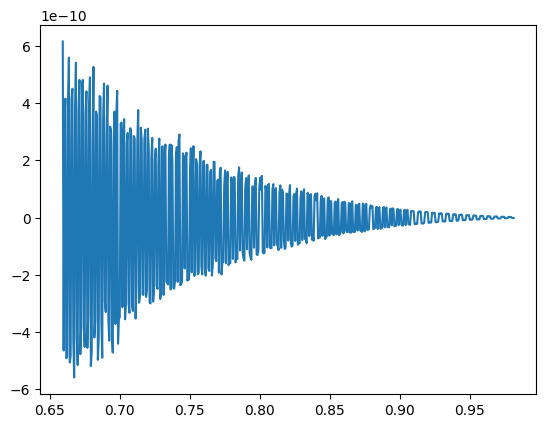

In [7]:
# now checking if our solver is in hydrostatic eq
g, _ = get_background_variable(DATA_FOLDER+RUN_NAME, 'g')
p, _ = get_background_variable(DATA_FOLDER+RUN_NAME, 'p0')
rho, _ = get_background_variable(DATA_FOLDER+RUN_NAME, 'rho0')
r, _ = get_background_variable(DATA_FOLDER+RUN_NAME, 'r')

dp_dr = np.gradient(p, r)


hydrostatic_eq = rho*g + dp_dr

# remove left end point
r = r[1:]
hydrostatic_eq = hydrostatic_eq[1:]

plt.plot(r/R_SUN, hydrostatic_eq)